In [1]:
import os
import sys

import pandas as pd
import numpy as np
import geopandas as gpd
import folium

import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/_compat.py:153: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  set_use_pygeos()
/tmp/ipykernel_13797/4027295472.py:6: DeprecationWarning: GeoPandas is set to use PyGEOS over Shapely. PyGEOS support is deprecatedand will be removed in GeoPandas 1.0, released in the Q1 of 2024. Please migrate to Shapely 2.0 (https://geopandas.org/en/stable/docs/user_guide/pygeos_to_shapely.html).
  import geopandas as gpd


2024-01-26 09:14:59 Configured OSMnx 1.1.2
2024-01-26 09:14:59 HTTP response caching is on


## Read top city data

In [2]:
top_10 = pd.read_csv('../../../data/processed/nearshoring/top_10_cities_analysis.csv')

## Proximity data

In [3]:
schema = 'prox_analysis'
table = 'proximityanalysis_20_ageb_hex8'
cities = list(top_10.city.unique())
query = f"SELECT * FROM {schema}.{table} WHERE \"city\" IN {str(tuple(cities))}"
hex_polygon = aup.gdf_from_query(query)

In [4]:
hex_polygon.city.unique()

array(['Tijuana', 'Saltillo', 'Juarez', 'Guadalajara', 'Toluca',
       'Monterrey', 'Puebla', 'Queretaro', 'SLP', 'ZMVM'], dtype=object)

In [5]:
print(hex_polygon.shape)
hex_polygon.head(2)

(10973, 34)


,hex_id,res,geometry,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,...,pobmas,pob_0a2,pob_3a5,pob_0a5,pob_0a14,pob_15a24,pob_25a59,p_60ymas,dens_pobha,city
0,8848593631fffff,8,"POLYGON ((-116.58375 32.48140, -116.58833 32.4...",38.534157,33.981365,38.534157,36.009121,229.564713,53.514935,36.889154,...,10.532609,1.206522,1.586957,2.793478,6.641304,4.195652,8.608695,1.608696,0.246509,Tijuana
1,8829a4c949fffff,8,"POLYGON ((-116.66447 32.57378, -116.66330 32.5...",8.117746,8.117746,5.895894,6.577442,26.991188,25.123523,26.991188,...,1385.877200,89.800000,124.315380,214.115380,546.953910,465.269200,1350.592180,357.769320,31.905091,Tijuana


In [6]:
hex_polygon[['city','max_escuelas','max_servicios comunitarios',
             'max_comercio','max_entretenimiento']].groupby('city').mean()

,max_escuelas,max_servicios comunitarios,max_comercio,max_entretenimiento
city,,,,
Guadalajara,35.275524,48.880474,18.832511,98.511028
Juarez,38.906130,65.586237,24.407823,91.067795
Monterrey,37.291591,52.472029,28.456024,78.533384
Puebla,81.875355,112.439016,70.866944,169.161626
Queretaro,51.220123,76.567529,25.046273,122.804802
SLP,54.512374,57.441938,26.106252,93.958260
Saltillo,62.307193,57.612626,41.101507,79.733716
Tijuana,37.615904,58.500983,33.384941,79.836693
Toluca,27.377452,46.185168,17.068039,100.855652


## Read industry data

Read the hexgrid for the whole municipality to include urban and rural poylgon to the analysis.

In [7]:
schema = 'hexgrid'
table = 'hexgrid_8_city_2020'
cities = list(top_10.city.unique())
query = f"SELECT * FROM {schema}.{table} WHERE \"city\" IN {str(tuple(cities))}"
hex_mun = aup.gdf_from_query(query)
print(hex_mun.shape)
hex_mun.head(2)

(49959, 6)


,hex_id_8,geometry,CVEGEO,NOMGEO,city,type
0,8848a2850bfffff,"POLYGON ((-100.51841 25.32212, -100.51367 25.3...",05004,Arteaga,Saltillo,rural
1,8848a049bdfffff,"POLYGON ((-100.70797 25.32476, -100.70324 25.3...",05004,Arteaga,Saltillo,rural


In [10]:
schema = 'public_interest'
table = 'nearshoring_denue_23_hex'
hex_ids = list(hex_mun.hex_id_8.unique())
query = f"SELECT * FROM {schema}.{table} WHERE \"hex_id\" IN {str(tuple(hex_ids))}"
hex_near = aup.gdf_from_query(query)
print(hex_near.shape)
hex_near.head(2)

(1936, 9)


,hex_id,geometry,nearshoring_industry,per_ocu_num_near_sum,denue,per_ocu_num_tot_sum,nearshoring_industry_pct,nearshoring_workforce_pct,res
0,8829a4c2b5fffff,"POLYGON ((-116.95671 32.51277, -116.95215 32.5...",1,325,1,325,1.000000,1.000000,8
1,8829a4c2abfffff,"POLYGON ((-116.95317 32.49777, -116.94861 32.5...",1,3,13,232,0.076923,0.012931,8


<AxesSubplot: >

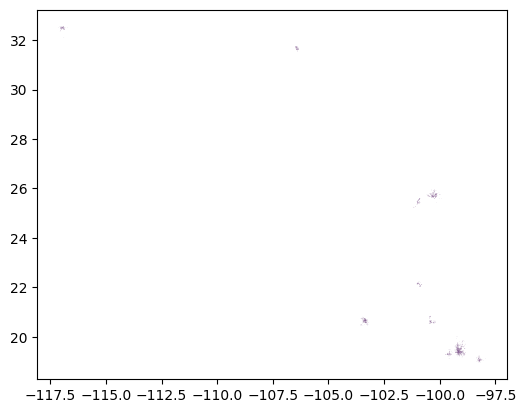

In [11]:
hex_near.plot('nearshoring_industry')

## Merge data

In [20]:
hex_near_prox = hex_polygon.merge(hex_near.drop(columns=['res']), on='hex_id', how='outer')
print(hex_near_prox.shape)
hex_near_prox.head(2)

(11093, 41)


,hex_id,res,geometry_x,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,...,p_60ymas,dens_pobha,city,geometry_y,nearshoring_industry,per_ocu_num_near_sum,denue,per_ocu_num_tot_sum,nearshoring_industry_pct,nearshoring_workforce_pct
0,8848593631fffff,8.0,"POLYGON ((-116.58375 32.48140, -116.58833 32.4...",38.534157,33.981365,38.534157,36.009121,229.564713,53.514935,36.889154,...,1.608696,0.246509,Tijuana,None,NaN,NaN,NaN,NaN,NaN,NaN
1,8829a4c949fffff,8.0,"POLYGON ((-116.66447 32.57378, -116.66330 32.5...",8.117746,8.117746,5.895894,6.577442,26.991188,25.123523,26.991188,...,357.769320,31.905091,Tijuana,None,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
hex_near_prox.loc[hex_near_prox.geometry_x.isnull(),'geometry_x'] = hex_near_prox['geometry_y']
hex_near_prox = hex_near_prox.rename(columns={'geometry_x':'geometry'})
hex_near_prox = hex_near_prox.drop(columns=['geometry_y'])
hex_near_prox.tail(4)

,hex_id,res,geometry,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,...,pob_25a59,p_60ymas,dens_pobha,city,nearshoring_industry,per_ocu_num_near_sum,denue,per_ocu_num_tot_sum,nearshoring_industry_pct,nearshoring_workforce_pct
11089,88498352d5fffff,NaN,"POLYGON ((-100.42721 20.81715, -100.42264 20.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,325.0,4.0,865.0,0.250000,0.375723
11090,88499da9a5fffff,NaN,"POLYGON ((-100.90162 22.22169, -100.89700 22.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,325.0,4.0,615.0,0.250000,0.528455
11091,88499d0611fffff,NaN,"POLYGON ((-100.84928 22.17869, -100.84467 22.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,175.0,2.0,250.0,0.500000,0.700000
11092,8849943731fffff,NaN,"POLYGON ((-98.22789 19.16221, -98.22337 19.165...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,3.0,24.0,862.0,0.041667,0.003480


In [30]:
hex_near_prox.columns

Index(['hex_id', 'res_x', 'geometry_x', 'max_escuelas', 'max_preescolar',
       'max_primaria', 'max_secundaria', 'max_servicios comunitarios',
       'max_salud', 'max_guarderías', 'max_asistencia social', 'max_comercio',
       'max_alimentos', 'max_personal', 'max_farmacias', 'max_hogar',
       'max_complementarios', 'max_entretenimiento', 'max_social',
       'max_actividad física', 'max_cultural', 'max_idx_15_min', 'pobtot',
       'pobfem', 'pobmas', 'pob_0a2', 'pob_3a5', 'pob_0a5', 'pob_0a14',
       'pob_15a24', 'pob_25a59', 'p_60ymas', 'dens_pobha', 'city',
       'geometry_y', 'nearshoring_industry', 'per_ocu_num_near_sum', 'denue',
       'per_ocu_num_tot_sum', 'nearshoring_industry_pct',
       'nearshoring_workforce_pct', 'res_y'],
      dtype='object')

## Fill time gaps

Fill time gaps through IDW interpolation

Change cooridnate system to meters

In [23]:
hex_near_prox = gpd.GeoDataFrame(data=hex_near_prox, geometry=hex_near_prox['geometry'])
hex_near_prox = hex_near_prox.to_crs("EPSG:6372")

In [28]:
gpd.GeoDataFrame(data = ,geometry=hex_near_prox.loc[hex_near_prox.max_escuelas.notnull()].centroid)

,geometry
0,POINT (1122019.733 2337869.504)
1,POINT (1115941.811 2349248.866)
2,POINT (1123271.141 2340584.652)
3,POINT (1117510.770 2348559.316)
4,POINT (1116100.769 2347546.741)
...,...
10968,POINT (2807329.523 857391.613)
10969,POINT (2807058.353 854789.317)
10970,POINT (2807894.278 856589.177)
10971,POINT (2806764.750 858194.084)


In [ ]:
prox_cnt = 

In [24]:
hex_near_prox

,hex_id,res,geometry,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,...,pob_25a59,p_60ymas,dens_pobha,city,nearshoring_industry,per_ocu_num_near_sum,denue,per_ocu_num_tot_sum,nearshoring_industry_pct,nearshoring_workforce_pct
0,8848593631fffff,8.0,"POLYGON ((1121966.752 2338437.091, 1121496.658...",38.534157,33.981365,38.534157,36.009121,229.564713,53.514935,36.889154,...,8.608695,1.608696,0.246509,Tijuana,NaN,NaN,NaN,NaN,NaN,NaN
1,8829a4c949fffff,8.0,"POLYGON ((1115418.840 2349478.693, 1115471.827...",8.117746,8.117746,5.895894,6.577442,26.991188,25.123523,26.991188,...,1350.592180,357.769320,31.905091,Tijuana,NaN,NaN,NaN,NaN,NaN,NaN
2,8848593455fffff,8.0,"POLYGON ((1123324.114 2340017.081, 1123794.245...",50.274380,26.156032,46.333664,50.274380,190.177765,27.516865,48.579466,...,46.928580,10.071428,1.237481,Tijuana,NaN,NaN,NaN,NaN,NaN,NaN
3,884859349bfffff,8.0,"POLYGON ((1118033.771 2348329.443, 1117980.783...",17.819516,7.290105,17.819516,7.965988,15.192391,15.192391,7.508140,...,1533.876180,536.330600,37.598114,Tijuana,NaN,NaN,NaN,NaN,NaN,NaN
4,8829a4cb21fffff,8.0,"POLYGON ((1116570.755 2347884.270, 1116047.779...",27.337842,27.337842,8.338477,14.914443,28.408414,15.486340,28.408414,...,506.977840,132.528340,12.399490,Tijuana,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11088,88498352d3fffff,NaN,"POLYGON ((2661451.108 980380.571, 2661920.966 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,725.0,15.0,2124.0,0.200000,0.341337
11089,88498352d5fffff,NaN,"POLYGON ((2663009.316 979665.822, 2663479.146 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,325.0,4.0,865.0,0.250000,0.375723
11090,88499da9a5fffff,NaN,"POLYGON ((2612655.911 1133971.939, 2613126.832...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,325.0,4.0,615.0,0.250000,0.528455
11091,88499d0611fffff,NaN,"POLYGON ((2618061.384 1129276.909, 2618532.209...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,175.0,2.0,250.0,0.500000,0.700000


## Time analysis

In [34]:
hex_near_prox.loc[hex_near_prox.nearshoring_industry>1,['city','max_escuelas','max_servicios comunitarios','max_comercio','max_entretenimiento']].groupby('city').agg(['mean','count'])

max_escuelas       max_servicios comunitarios       max_comercio  \
                    mean count                       mean count         mean   
city                                                                           
Guadalajara    19.772520   103                  19.051041   103     7.237662   
Juarez         31.615520    50                  33.246698    50    14.336298   
Monterrey      28.141731   101                  29.862920   101    18.496142   
Puebla         21.196109    48                  28.151850    48    10.659120   
Queretaro      30.888190    38                  37.149428    38    14.281108   
SLP            73.997530    31                  69.478804    31    37.890411   
Saltillo       68.716591    27                  62.899612    27    52.156362   
Tijuana        29.835708    58                  32.616905    58    16.672940   
Toluca         19.959582    39                  21.461691    39    11.426091   
ZMVM           13.489502   335                  14.022190   335     5.807729   

                  max_entretenimiento        
            count                mean count  
city                                         
Guadalajara   103           38.018260   103  
Juarez         50           41.096914    50  
Monterrey     101           42.833001   101  
Puebla         48           55.629601    48  
Queretaro      38           55.452432    38  
SLP            31          120.630911    31  
Saltillo       27           67.176997    27  
Tijuana        58           48.839831    58  
Toluca         39           37.695974    39  
ZMVM          335           25.797682   335

In [35]:
hex_polygon[['city','max_escuelas','max_servicios comunitarios',
             'max_comercio','max_entretenimiento']].groupby('city').agg(['mean','count'])

max_escuelas       max_servicios comunitarios       max_comercio  \
                    mean count                       mean count         mean   
city                                                                           
Guadalajara    35.275524  1187                  48.880474  1187    18.832511   
Juarez         38.906130   467                  65.586237   467    24.407823   
Monterrey      37.291591  1545                  52.472029  1545    28.456024   
Puebla         81.875355  1253                 112.439016  1253    70.866944   
Queretaro      51.220123   548                  76.567529   548    25.046273   
SLP            54.512374   351                  57.441938   351    26.106252   
Saltillo       62.307193   378                  57.612626   378    41.101507   
Tijuana        37.615904   618                  58.500983   618    33.384941   
Toluca         27.377452   859                  46.185168   859    17.068039   
ZMVM           24.544767  3767                  41.713476  3767    13.443647   

                  max_entretenimiento        
            count                mean count  
city                                         
Guadalajara  1187           98.511028  1187  
Juarez        467           91.067795   467  
Monterrey    1545           78.533384  1545  
Puebla       1253          169.161626  1253  
Queretaro     548          122.804802   548  
SLP           351           93.958260   351  
Saltillo      378           79.733716   378  
Tijuana       618           79.836693   618  
Toluca        859          100.855652   859  
ZMVM         3767           73.588553  3767